In [2]:
import pickle

dataset_path_dict = {
        "embeddings": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/google_vit-base-patch16-224_embeddings_softmax.pkl",
        "neural": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy"
    }

with open(dataset_path_dict['embeddings'], "rb") as f:
            embeddings_raw = pickle.load(f)
            
embeddings=embeddings_raw['natural_scenes']


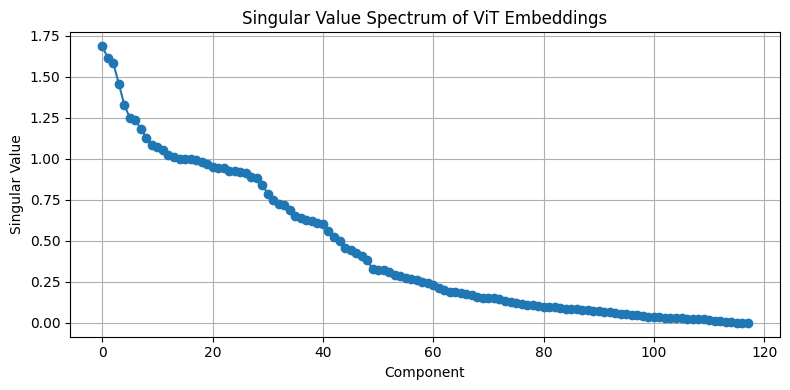

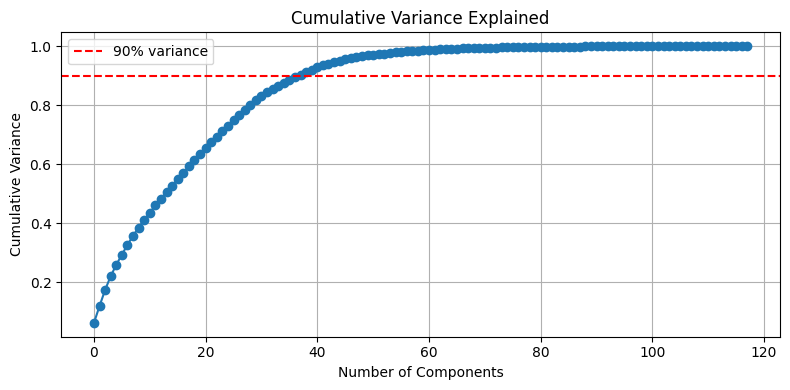

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# embeddings is your (n_images x d_features) matrix
# Step 1: Mean-center the data (important for SVD/PCA)

embeddings_centered = embeddings - embeddings.mean(axis=0)

# Step 2: Compute SVD
U, S, Vt = np.linalg.svd(embeddings_centered, full_matrices=False)

# Step 3: Plot singular value spectrum
plt.figure(figsize=(8, 4))
plt.plot(S, marker='o')
plt.title("Singular Value Spectrum of ViT Embeddings")
plt.xlabel("Component")
plt.ylabel("Singular Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Explained variance
explained = (S ** 2) / np.sum(S ** 2)
cumulative = np.cumsum(explained)

plt.figure(figsize=(8, 4))
plt.plot(cumulative, marker='o')
plt.axhline(0.9, color='r', linestyle='--', label='90% variance')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
embeddings.shape

(118, 1000)

In [8]:
explained

array([6.17997982e-02, 5.63002974e-02, 5.50770275e-02, 4.63278256e-02,
       3.80660035e-02, 3.63622084e-02, 3.27151306e-02, 3.10629774e-02,
       2.75809951e-02, 2.56158318e-02, 2.50030831e-02, 2.43204664e-02,
       2.26007942e-02, 2.21248493e-02, 2.15688366e-02, 2.14956403e-02,
       2.14501433e-02, 2.12154202e-02, 2.08786204e-02, 2.03271229e-02,
       1.98150184e-02, 1.93504300e-02, 1.91130284e-02, 1.90500841e-02,
       1.84366629e-02, 1.82863642e-02, 1.81205161e-02, 1.72361881e-02,
       1.68211386e-02, 1.67334918e-02, 1.42692588e-02, 1.22457342e-02,
       1.14009269e-02, 1.12821730e-02, 1.09051391e-02, 9.23780911e-03,
       8.89881328e-03, 8.42460152e-03, 8.33909307e-03, 8.24874919e-03,
       7.74081284e-03, 7.68503640e-03, 6.17004232e-03, 5.48609346e-03,
       4.71161911e-03, 4.29718802e-03, 4.26494237e-03, 3.83123779e-03,
       3.15610785e-03, 2.33819312e-03, 2.29788246e-03, 2.22942187e-03,
       2.19324487e-03, 2.08709063e-03, 1.78486586e-03, 1.62530364e-03,
      

In [13]:
k=50
mean_probs = embeddings.mean(axis=0)
topk_idx = np.argsort(mean_probs)[-k:]
embeddings_topk = embeddings[:, topk_idx]

In [15]:
embeddings_topk.shape

(118, 50)

In [16]:
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')  # shape: (neurons, 118)


In [17]:
import numpy as np
import statsmodels.api as sm

# Load your data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')  # (neurons x 118)
# embeddings_topk should already be in your environment (shape: 118 x k)
assert dat.shape[1] == embeddings_topk.shape[0], "Stimulus count mismatch!"

n_trials = 50
n_neurons = dat.shape[0]

# Transpose dat to (stimuli x neurons)
dat_T = dat.T  # shape (118, n_neurons)

# Run GLM for each neuron
results = []
for i in range(n_neurons):
    y_counts = dat_T[:, i]
    y_successes = np.clip(np.round(y_counts), 0, n_trials)
    y_failures = n_trials - y_successes
    y = np.column_stack((y_successes, y_failures))  # binomial format

    X = sm.add_constant(embeddings_topk)

    try:
        model = sm.GLM(y, X, family=sm.families.Binomial())
        result = model.fit()
        results.append(result)
        print(f"Neuron {i}: Done")
    except Exception as e:
        print(f"Neuron {i}: Error - {e}")
        results.append(None)


Neuron 0: Done
Neuron 1: Done
Neuron 2: Done
Neuron 3: Done
Neuron 4: Done
Neuron 5: Done
Neuron 6: Done
Neuron 7: Done
Neuron 8: Done
Neuron 9: Done
Neuron 10: Done
Neuron 11: Done
Neuron 12: Done
Neuron 13: Done
Neuron 14: Done
Neuron 15: Done
Neuron 16: Done
Neuron 17: Done
Neuron 18: Done
Neuron 19: Done
Neuron 20: Done
Neuron 21: Done
Neuron 22: Done
Neuron 23: Done
Neuron 24: Done
Neuron 25: Done
Neuron 26: Done


/home/maria/global_venv/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Neuron 27: Done
Neuron 28: Done
Neuron 29: Done
Neuron 30: Done
Neuron 31: Done
Neuron 32: Done
Neuron 33: Done
Neuron 34: Done
Neuron 35: Done
Neuron 36: Done
Neuron 37: Done
Neuron 38: Done
Neuron 39: Done
Neuron 40: Done
Neuron 41: Done
Neuron 42: Done
Neuron 43: Done
Neuron 44: Done
Neuron 45: Done
Neuron 46: Done
Neuron 47: Done
Neuron 48: Done
Neuron 49: Done
Neuron 50: Done
Neuron 51: Done
Neuron 52: Done
Neuron 53: Done
Neuron 54: Done
Neuron 55: Done
Neuron 56: Done
Neuron 57: Done
Neuron 58: Done
Neuron 59: Done
Neuron 60: Done
Neuron 61: Done
Neuron 62: Done
Neuron 63: Done
Neuron 64: Done
Neuron 65: Done
Neuron 66: Done
Neuron 67: Done
Neuron 68: Done
Neuron 69: Done
Neuron 70: Done
Neuron 71: Done
Neuron 72: Done
Neuron 73: Done
Neuron 74: Done
Neuron 75: Done
Neuron 76: Done
Neuron 77: Done
Neuron 78: Done
Neuron 79: Done
Neuron 80: Done
Neuron 81: Done
Neuron 82: Done
Neuron 83: Done
Neuron 84: Done
Neuron 85: Done
Neuron 86: Done
Neuron 87: Done
Neuron 88: Done
Neuron 8

In [18]:
neuron_idx = 0
if results[neuron_idx]:
    print(results[neuron_idx].summary())
    print("\nSignificant features (p < 0.05):")
    print(results[neuron_idx].pvalues[results[neuron_idx].pvalues < 0.05])

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  118
Model:                            GLM   Df Residuals:                       67
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.66
Date:                Mon, 21 Jul 2025   Deviance:                       126.44
Time:                        03:50:06   Pearson chi2:                     106.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.5553
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8278      0.161    -17.582      0.0